# Boston housing dataset analysis
___

> Author: **Andrzej Kocielski**  
GitHub: [andkoc001](https://github.com/andkoc001/)  
Email: and.koc001@gmail.com  
Date of creation: 28-09-2019


This Jupyter Notebook is a journal of the _Boston housing dataset_ analysis project. More background information is available in [boston_housing_README.md](https://github.com/andkoc001/ML_Projects/boston_housing_README.md) file in the repository folder at https://github.com/andkoc001/ML_Projects.

## Setting up the scene

### Importing required libraries

In [2]:
# data modeling
import numpy as np
import pandas as pd

# data visualisation
import matplotlib.pyplot as plt 
import seaborn as sns 

# This allows the plots being displayed inside the notebook, rather than in a separate screen.
%matplotlib inline 

### Getting data

As the _Boston housing dataset_ is available within [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) library, I am going to call it up and assign to variable `boston_housing`.  
In the following step, I am converting the data set to _DataFrame_ data type (Pandas) and assign to it name `boston`.

In [3]:
# Adopted from https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
# Importing the data set
from sklearn.datasets import load_boston
boston_housing = load_boston()

# Assigning the data set as dataframe data type
boston = pd.DataFrame(boston_housing.data, columns=boston_housing.feature_names)

### Dataset integrity check

Below is a quick look into the dataset.  
First, we will look at the shape of the dataset, that is number of rows (observations) and number of columns (features) respectively.

In [4]:
boston.shape # rows, columns

(506, 13)

Let's see several first and several last rows of the dataset - in order to get an idea about the nature of the data (e.g. data types) and also to see if the entire dataset is coherent (e.g. not gone corrupt).

In [10]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
boston.tail(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


Next, we will get insight into the data types of each column (we remember that above the entire dataset has been converted to _DataFrame_).

In [8]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

When working with data, it is (always?) a good practice to verify whether there are not any empty data cells - _null_ value.

In [16]:
boston.isnull().sum() # return quantity of null values in the subset (column) 

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

___
## Data analysis

### Descriptive statistical analysis¶

From above, we know already that there are 13 columns in the dataset. These columns are (taken from: [Towards Data Science](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)):

**CRIM**: Per capita crime rate by town  
**ZN**: Proportion of residential land zoned for lots over 25,000 sq. ft  
**INDUS**: Proportion of non-retail business acres per town  
**CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
**NOX**: Nitric oxide concentration (parts per 10 million)  
**RM**: Average number of rooms per dwelling  
**AGE**: Proportion of owner-occupied units built prior to 1940  
**DIS**: Weighted distances to five Boston employment centers  
**RAD**: Index of accessibility to radial highways  
**TAX**: Full-value property tax rate per \$10,000  
**PTRATIO**: Pupil-teacher ratio by town  
B = 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town  
**LSTAT**: Percentage of lower status of the population  

Basic statistical description of the numerical categories (columns) of the data set.

In [8]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### Dataset visualisation

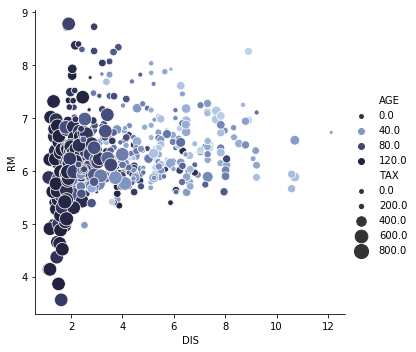

In [38]:
sns.relplot(x="DIS", y="RM", size="TAX", sizes=(15, 200), hue="AGE", palette="ch:r=-.1,l=.85", data=boston);